# <font color=blue>Extreme Gradient Boosting with XGBoost</font> 

## <font color=red>01 -  Classification with XGBoost  </font> 
 This chapter will introduce you to the fundamental idea behind XGBoost - boosted learners. Once you understand how XGBoost works, you'll apply it to solve a common classification problem found in industry, namely, predicting whether a customer will stop being a customer at some point in the future. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">XGBoost: Fit/Predict</h1><div class=""><p><p>It's time to create your first XGBoost model! As Sergey showed you in the video, you can use the scikit-learn <code>.fit()</code> / <code>.predict()</code> paradigm that you are already familiar to build your XGBoost models, as the <code>xgboost</code> library has a scikit-learn compatible API!</p>
<p>Here, you'll be working with churn data. This dataset contains imaginary data from a ride-sharing app with user behaviors over their first month of app usage in a set of imaginary cities as well as whether they used the service 5 months after sign-up. It has been pre-loaded for you into a DataFrame called <code>churn_data</code> - explore it in the Shell!</p>
<p>Your goal is to use the first month's worth of data to predict whether the app's users will remain users of the service at the 5 month mark. This is a typical setup for a churn prediction problem. To do this, you'll split the data into training and test sets, fit a small <code>xgboost</code> model on the training set, and evaluate its performance on the test set by computing its accuracy.</p>
<p><code>pandas</code> and <code>numpy</code> have been imported as <code>pd</code> and <code>np</code>, and <code>train_test_split</code> has been imported from <code>sklearn.model_selection</code>. Additionally, the arrays for the features and the target have been created as <code>X</code> and <code>y</code>.</p></div></div>

In [ ]:
# Import xgboost
import xgboost as xgb

# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Decision trees</h1><div class=""><p><p>Your task in this exercise is to make a simple decision tree using scikit-learn's <code>DecisionTreeClassifier</code> on the <code>breast cancer</code> dataset that comes pre-loaded with scikit-learn. </p>
<p>This dataset contains numeric measurements of various dimensions of individual tumors (such as perimeter and texture) from breast biopsies and a single outcome value (the tumor is either malignant, or benign). </p>
<p>We've preloaded the dataset of samples (measurements) into <code>X</code> and the target values per tumor into <code>y</code>. Now, you have to split the complete dataset into training and testing sets, and then train a <code>DecisionTreeClassifier</code>. You'll specify a parameter called <code>max_depth</code>. Many other parameters can be modified within this model, and you can check all of them out <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier" target="_blank" rel="noopener noreferrer">here</a>.</p></div></div></div>

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

In [4]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth = 4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)


accuracy: 0.9736842105263158


<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Measuring accuracy</h1><div class=""><p><p>You'll now practice using XGBoost's learning API through its baked in cross-validation capabilities. As Sergey discussed in the previous video, XGBoost gets its lauded performance and efficiency gains by utilizing its own optimized data structure for datasets called a <code>DMatrix</code>.</p>
<p>In the previous exercise, the input datasets were converted into <code>DMatrix</code> data on the fly, but when you use the <code>xgboost</code> <code>cv</code> object, you have to first explicitly convert your data into a <code>DMatrix</code>. So, that's what you will do here before running cross-validation on <code>churn_data</code>.</p></div></div></div>

In [6]:
# Create the DMatrix: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3, "silent":1}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.025480         0.002451         0.066824        0.019564
1          0.021969         0.001257         0.061524        0.013876
2          0.014945         0.006589         0.056252        0.010004
3          0.012306         0.003300         0.052734        0.011418
4          0.010549         0.004314         0.054497        0.012485
0.9455026666666666


<div class="dc-completed__message"><p class="">Nice work. <code>cv_results</code> stores the training and test mean and standard deviation of the error per boosting round (tree built) as a DataFrame. From <code>cv_results</code>, the final round <code>'test-error-mean'</code> is extracted and converted into an accuracy, where accuracy is <code>1-error</code>. The final accuracy of around 75% is an improvement from earlier!</p></div>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Measuring AUC</h1><div class=""><p><p>Now that you've used cross-validation to compute average out-of-sample accuracy (after converting from an error), it's very easy to compute any other metric you might be interested in. All you have to do is pass it (or a list of metrics) in as an argument to the <code>metrics</code> parameter of <code>xgb.cv()</code>. </p>
<p>Your job in this exercise is to compute another common metric used in binary classification - the area under the curve (<code>"auc"</code>). As before, <code>churn_data</code> is available in your workspace, along with the DMatrix <code>churn_dmatrix</code> and parameter dictionary <code>params</code>.</p></div></div>

In [7]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, 
                    metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.987225       0.001301       0.961473      0.024760
1        0.993244       0.004295       0.969078      0.022616
2        0.995224       0.003751       0.972491      0.024377
3        0.997125       0.002042       0.971354      0.025405
4        0.997610       0.001871       0.974002      0.026527
0.9740019999999999


Fantastic! An AUC of 0.84 is quite strong. As you have seen, XGBoost's learning API makes it very easy to compute any metric you may be interested in. In Chapter 3, you'll learn about techniques to fine-tune your XGBoost models to improve their performance even further. For now, it's time to learn a little about exactly when to use XGBoost.

## <font color=red>02 - Regression with XGBoost </font> 
 After a brief review of supervised regression, you'll apply XGBoost to the regression task of predicting house prices in Ames, Iowa. Along the way, you'll learn about the two kinds of base learners that XGboost can use as its weak learners, and review how to evaluate the quality of your regression models. 

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Decision trees as base learners</h1><div class=""><p><p>It's now time to build an XGBoost model to predict house prices - not in Boston, Massachusetts, as you saw in the video, but in Ames, Iowa! This dataset of housing prices has been pre-loaded into a DataFrame called <code>df</code>. If you explore it in the Shell, you'll see that there are a variety of features about the house and its location in the city.</p>
<p>In this exercise, your goal is to use trees as base learners. By default, XGBoost uses trees as base learners, so you don't have to specify that you want to use trees here with <code>booster="gbtree"</code>.</p>
<p><code>xgboost</code> has been imported as <code>xgb</code> and the arrays for the features and the target are available in <code>X</code> and <code>y</code>, respectively.</p></div></div></div>

In [8]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

boston = load_boston()

boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names

boston_df['PRICE'] = boston.target

X, y = boston_df.iloc[:,:-1],boston_df.iloc[:,-1]

In [9]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective ='reg:linear', seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.911533


<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Linear base learners</h1><div class=""><p><p>Now that you've used trees as base models in XGBoost, let's use the other kind of base model that can be used with XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as <code>xgb.train()</code>. </p>
<p>In order to do this you must create the parameter dictionary that describes the kind of booster you want to use (similarly to how <a href="https://campus.datacamp.com/courses/extreme-gradient-boosting-with-xgboost/10555?ex=9" target="_blank" rel="noopener noreferrer">you created the dictionary in Chapter 1</a> when you used <code>xgb.cv()</code>). The key-value pair that defines the booster type (base model) you need is <code>"booster":"gblinear"</code>.</p>
<p>Once you've created the model, you can use the <code>.train()</code> and <code>.predict()</code> methods of the model just like you've done in the past.</p>
<p>Here, the data has already been split into training and testing sets, so you can dive right into creating the <code>DMatrix</code> objects required by the XGBoost learning API.</p></div></div></div>

In [14]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 6.630371


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluating model quality</h1><div class=""><p><p>It's now time to begin evaluating model quality.  </p>
<p>Here, you will compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data. As in previous exercises, all necessary modules have been pre-loaded and the data is available in the DataFrame <code>df</code>.</p></div></div>

In [16]:
df = pd.read_csv("./data/ames_housing_trimmed_processed.csv")

In [17]:
X = df.drop("SalePrice", axis=1)
y = df.SalePrice

In [18]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4, "silent":1}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, 
                    num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.531250      429.454591   142980.433594    1193.791602
1    102832.544922      322.469930   104891.394532    1223.158855
2     75872.615235      266.475960    79478.937500    1601.344539
3     57245.652344      273.625086    62411.920899    2220.150028
4     44401.298828      316.423666    51348.279297    2963.377719


In [19]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,141767.531250,429.454591,142980.433594,1193.791602
1,102832.544922,322.469930,104891.394532,1223.158855
2,75872.615235,266.475960,79478.937500,1601.344539
3,57245.652344,273.625086,62411.920899,2220.150028
4,44401.298828,316.423666,51348.279297,2963.377719


In [20]:
# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

4    51348.279297
Name: test-rmse-mean, dtype: float64


In [21]:
# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, 
                    num_boost_round=5, metrics="mae", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.482422     668.308109  127634.000000   2404.009898
1    89770.056641     456.965267   90122.501954   2107.912810
2    63580.791016     263.404950   64278.558594   1887.567576
3    45633.155274     151.883420   46819.168946   1459.818607
4    33587.090820      86.999396   35670.646485   1140.607452
4    35670.646485
Name: test-mae-mean, dtype: float64


<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Using regularization in XGBoost</h1><div class=""><p><p>Having seen an example of l1 regularization in the video, you'll now vary the l2 regularization penalty - also known as <code>"lambda"</code> - and see its effect on overall model performance on the Ames housing dataset.</p></div></div></div>

In [22]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3, "silent":1}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, 
                             metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.357422
1   10  57746.064453
2  100  76624.625001


<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualizing individual XGBoost trees</h1><div class=""><p><p>Now that you've used XGBoost to both build and evaluate regression as well as classification models, you should get a handle on how to visually explore your models. Here, you will visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset.</p>
<p>XGBoost has a <code>plot_tree()</code> function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the <code>plot_tree()</code> function along with the number of trees you want to plot using the <code>num_trees</code> argument.</p></div></div></div>

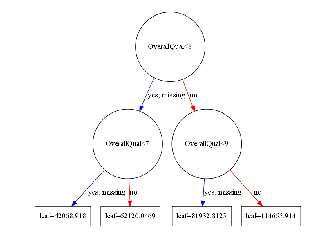

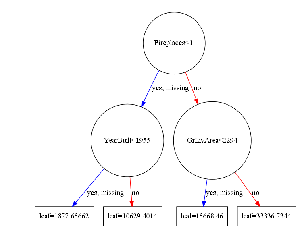

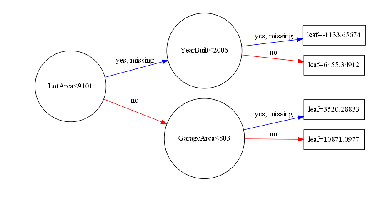

In [24]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2, "silent":1}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
ax1 = xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
ax2 = xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
ax3 = xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")
plt.show()

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualizing feature importances: What features are most important in my dataset</h1><div class=""><p><p>Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model. </p>
<p>One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a <code>plot_importance()</code> function that allows you to do exactly this, and you'll get a chance to use it in this exercise!</p></div></div></div>

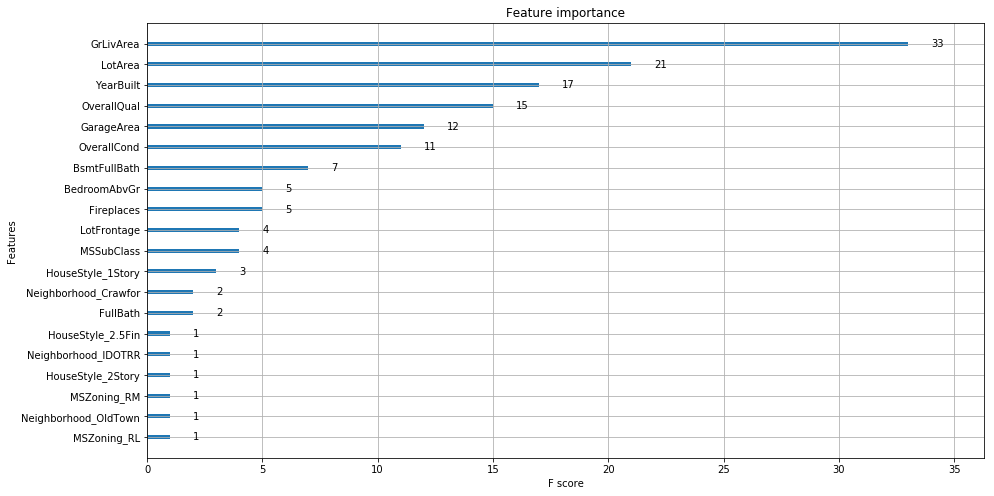

In [25]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4, "silent":1}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
ax = xgb.plot_importance(xg_reg)
fig = ax.figure
fig.set_size_inches(15,8)
plt.show()

## <font color=red>03 - Fine-tuning your XGBoost model  </font> 
 This chapter will teach you how to make your XGBoost models as performant as possible. You'll learn about the variety of parameters that can be adjusted to alter the behavior of XGBoost and how to tune them efficiently so that you can supercharge the performance of your models! 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Tuning the number of boosting rounds</h1><div class=""><p><p>Let's start with parameter tuning by seeing how the number of boosting rounds (number of trees you build) impacts the out-of-sample performance of your XGBoost model. You'll use <code>xgb.cv()</code> inside a <code>for</code> loop and build one model per <code>num_boost_round</code> parameter.</p>
<p>Here, you'll continue working with the Ames housing dataset. The features are available in the array <code>X</code>, and the target vector is contained in <code>y</code>.</p></div></div>

In [36]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X,y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3, "silent":1}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15, 20, 25]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

In [37]:
# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, 
                        num_boost_round=curr_num_rounds, metrics="rmse", 
                        as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

In [38]:
# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
display(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

,num_boosting_rounds,rmse
0,5,50903.299479
1,10,34774.194011
2,15,32895.098958
3,20,32019.970052
4,25,31849.582682


<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Automated boosting round selection using early_stopping</h1><div class=""><p><p>Now, instead of attempting to cherry pick the best possible number of boosting rounds, you can very easily have XGBoost automatically select the number of boosting rounds for you within <code>xgb.cv()</code>. This is done using a technique called <strong>early stopping</strong>. </p>
<p><strong>Early stopping</strong> works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric (<code>"rmse"</code> in our case) does not improve for a given number of rounds. Here you will use the <code>early_stopping_rounds</code> parameter in <code>xgb.cv()</code> with a large possible number of boosting rounds (50). Bear in mind that if the holdout metric continuously improves up through when <code>num_boosting_rounds</code> is reached, then early stopping does not occur.</p>
<p>Here, the <code>DMatrix</code> and parameter dictionary have been created for you. Your task is to use cross-validation with early stopping. Go for it!</p></div></div></div>

In [45]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":4, "silent":1}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, metrics="rmse",
                   early_stopping_rounds=10, num_boost_round = 50, seed = 123 )


# Print cv_results
print(cv_results)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     141871.630208      403.632626   142640.656250     705.559400
1     103057.036459       73.769561   104907.664063     111.113862
2      75975.966146      253.726099    79262.059896     563.766991
3      57420.529948      521.658354    61620.136719    1087.694282
4      44552.955729      544.170190    50437.562500    1846.448017
5      35763.949219      681.798925    43035.658854    2034.471024
6      29861.464844      769.571318    38600.880208    2169.796232
7      25994.675781      756.521419    36071.817708    2109.795430
8      23306.836588      759.238254    34383.184896    1934.546688
9      21459.770833      745.624405    33509.139974    1887.375633
10     20148.721354      749.612769    32916.805990    1850.893363
11     19215.382813      641.387376    32197.832682    1734.456935
12     18627.389323      716.256597    31770.852865    1802.155484
13     17960.695312      557.043568    31482.782552    1779.12

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Tuning eta</h1><div class=""><p><p>It's time to practice tuning other XGBoost hyperparameters in earnest and observing their effect on model performance! You'll begin by tuning the <code>"eta"</code>, also known as the learning rate.</p>
<p>The learning rate in XGBoost is a parameter that can range between <code>0</code> and <code>1</code>, with higher values of <code>"eta"</code> penalizing feature weights more strongly, causing much stronger regularization.</p></div></div></div>

In [47]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "max_depth":3, "silent":1}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, early_stopping_rounds=5,
                       num_boost_round = 10, metrics = "rmse", seed=123, as_pandas = True)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
display(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

,eta,best_rmse
0,0.001,195736.406250
1,0.010,179932.182292
2,0.100,79759.411459


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Tuning max_depth</h1><div class=""><p><p>In this exercise, your job is to tune <code>max_depth</code>, which is the parameter that dictates the maximum depth that each tree in a boosting round can grow to. Smaller values will lead to shallower trees, and larger values to deeper trees.</p></div></div>

In [49]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:linear", "silent":1}

# Create list of max_depth values
max_depths = [2,5,10,20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, early_stopping_rounds=5,
                        num_boost_round = 10, metrics = "rmse", seed=123, as_pandas = True)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

   max_depth     best_rmse
0          2  37957.468750
1          5  35596.599610
2         10  36065.546875
3         20  36739.576172


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Tuning colsample_bytree</h1><div class=""><p><p>Now, it's time to tune <code>"colsample_bytree"</code>. You've already seen this if you've ever worked with scikit-learn's <code>RandomForestClassifier</code> or <code>RandomForestRegressor</code>, where it just was called <code>max_features</code>. In both <code>xgboost</code> and <code>sklearn</code>, this parameter (although named differently) simply specifies the fraction of features to choose from at every split in a given tree. In <code>xgboost</code>, <code>colsample_bytree</code> must be specified as a float between 0 and 1.</p></div></div>

In [50]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:linear","max_depth":3, "silent":1}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params["colsample_bytree"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree     best_rmse
0               0.1  51764.712890
1               0.5  35612.806641
2               0.8  35509.833985
3               1.0  35836.046875


<p class="">Awesome! There are several other individual parameters that you can tune, such as <code>"subsample"</code>, which dictates the fraction of the training data that is used during any given boosting round. Next up: Grid Search and Random Search to tune XGBoost hyperparameters more efficiently!</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Grid Search with XGBoost</h1><div class=""><p><p>Now that you've learned how to tune parameters individually with XGBoost, let's take your parameter tuning to the next level by using scikit-learn's <code>GridSearch</code> and <code>RandomizedSearch</code> capabilities with internal cross-validation using the <code>GridSearchCV</code> and <code>RandomizedSearchCV</code> functions. You will use these to find the best model exhaustively from a collection of possible parameter values across multiple parameters simultaneously. Let's get to work, starting with <code>GridSearchCV</code>!</p></div></div>

In [54]:
from sklearn.model_selection import GridSearchCV

# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
                        scoring="neg_mean_squared_error", cv=4, verbose=1)

# Fit grid_mse to the data
grid_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  30031.61712064517


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.4s finished


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Random Search with XGBoost</h1><div class=""><p><p>Often, <code>GridSearchCV</code> can be really time consuming, so in practice, you may want to use <code>RandomizedSearchCV</code> instead, as you will do in this exercise. The good news is you only have to make a few modifications to your <code>GridSearchCV</code> code to do <code>RandomizedSearchCV</code>. The key difference is you have to specify a <code>param_distributions</code> parameter instead of a <code>param_grid</code> parameter.</p></div></div>

In [56]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 11)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator=gbm, scoring="neg_mean_squared_error", 
                                    n_iter=5, cv=4, verbose=1  )

# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters found:  {'n_estimators': 25, 'max_depth': 5}
Lowest RMSE found:  36636.35808132903


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.1s finished


## <font color=red>04 - Using XGBoost in pipelines </font> 
 Here, you'll take your XGBoost skills to the next level by incorporating your models into two end-to-end machine learning pipelines. You'll learn how to tune the most important XGBoost hyperparameters efficiently within a pipeline, as well as be introduced to some more advanced preprocessing techniques, all the while applying everything you've learned in the first three chapters. Enjoy! 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Exploratory data analysis</h1><div class=""><p><p>Before diving into the nitty gritty of pipelines and preprocessing, let's do some exploratory analysis of the original, unprocessed <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques" target="_blank" rel="noopener noreferrer">Ames housing dataset</a>. When you worked with this data in previous chapters, we preprocessed it for you so you could focus on the core XGBoost concepts. In this chapter, you'll do the preprocessing yourself!</p>
<p>A smaller version of this original, unprocessed dataset has been pre-loaded into a <code>pandas</code> DataFrame called <code>df</code>. Your task is to explore <code>df</code> in the Shell and pick the option that is <strong>incorrect</strong>. The larger purpose of this exercise is to understand the kinds of transformations you will need to perform in order to be able to use XGBoost.</p></div></div>

In [58]:
df = pd.read_csv('./data/ames_unprocessed_data.csv')

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Encoding categorical columns I: LabelEncoder</h1><div class=""><p><p>Now that you've seen what will need to be done to get the housing data ready for XGBoost, let's go through the process step-by-step. </p>
<p>First, you will need to fill in missing values - as you saw previously, the column <code>LotFrontage</code> has many missing values. Then, you will need to encode any categorical columns in the dataset using one-hot encoding so that they are encoded numerically. You can watch <a href="https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/preprocessing-and-pipelines?ex=1" target="_blank" rel="noopener noreferrer">this video</a> from <a href="https://www.datacamp.com/courses/supervised-learning-with-scikit-learn" target="_blank" rel="noopener noreferrer">Supervised Learning with scikit-learn</a> for a refresher on the idea. </p>
<p>The data has five categorical columns: <code>MSZoning</code>, <code>PavedDrive</code>, <code>Neighborhood</code>, <code>BldgType</code>, and <code>HouseStyle</code>. Scikit-learn has a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html" target="_blank" rel="noopener noreferrer">LabelEncoder</a> function that converts the values in each categorical column into integers. You'll practice using this here.</p></div></div>

In [59]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())

  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y
   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         3            15         0           5           2


<div class="dc-completed__message"><p class="">Well done! Notice how the entries in each categorical column are now encoded numerically. A <code>BldgTpe</code> of <code>1Fam</code> is encoded as <code>0</code>, while a <code>HouseStyle</code> of <code>2Story</code> is encoded as <code>5</code>.</p></div>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Encoding categorical columns II: OneHotEncoder</h1><div class=""><p><p>Okay - so you have your categorical columns encoded numerically. Can you now move onto using pipelines and XGBoost? Not yet! In the categorical columns of this dataset, there is no natural ordering between the entries. As an example: Using <code>LabelEncoder</code>, the <code>CollgCr</code> <code>Neighborhood</code> was encoded as <code>5</code>, while the <code>Veenker</code> <code>Neighborhood</code> was encoded as <code>24</code>, and <code>Crawfor</code> as <code>6</code>. Is <code>Veenker</code> "greater" than <code>Crawfor</code> and <code>CollgCr</code>? No - and allowing the model to assume this natural ordering may result in poor performance.</p>
<p>As a result, there is another step needed: You have to apply a one-hot encoding to create binary, or "dummy" variables. You can do this using scikit-learn's <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html" target="_blank" rel="noopener noreferrer">OneHotEncoder</a>.</p></div></div>

In [61]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(categorical_features=categorical_mask, sparse=False)

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Encoding categorical columns III: DictVectorizer</h1><div class=""><p><p>Alright, one final trick before you dive into pipelines. The two step process you just went through - <code>LabelEncoder</code> followed by <code>OneHotEncoder</code> - can be simplified by using a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html" target="_blank" rel="noopener noreferrer">DictVectorizer</a>. </p>
<p>Using a <code>DictVectorizer</code> on a DataFrame that has been converted to a dictionary allows you to get label encoding as well as one-hot encoding in one go. </p>
<p>Your task is to work through this strategy in this exercise!</p></div></div>

In [68]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict("records")

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

[[3.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 2.000e+00 5.480e+02
  1.710e+03 1.000e+00 5.000e+00 8.450e+03 6.500e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 2.000e+00 4.600e+02
  1.262e+03 0.000e+00 2.000e+00 9.600e+03 8.000e+01 2.000e+01 3.000e+00
  2.400e+01 8.000e+00 6.000e+00 2.000e+00 0.000e+00 1.815e+05 1.976e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 6.080e+02
  1.786e+03 1.000e+00 5.000e+00 1.125e+04 6.800e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 2.235e+05 2.001e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 1.000e+00 6.420e+02
  1.717e+03 0.000e+00 5.000e+00 9.550e+03 6.000e+01 7.000e+01 3.000e+00
  6.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 1.400e+05 1.915e+03]
 [4.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 8.360e+02
  2.198e+03 1.000e+00 5.000e+00 1.426e+04 8.400e+01 6.000e+0

<p class="">Fantastic! Besides simplifying the process into one step, <code>DictVectorizer</code> has useful attributes such as <code>vocabulary_</code> which maps the names of the features to their indices. With the data preprocessed, it's time to move onto pipelines!</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Preprocessing within a pipeline</h1><div class=""><p><p>Now that you've seen what steps need to be taken individually to properly process the Ames housing data, let's use the much cleaner and more succinct <code>DictVectorizer</code> approach and put it alongside an <code>XGBoostRegressor</code> inside of a scikit-learn pipeline.</p></div></div>

In [71]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict("records"), y)

Pipeline(memory=None,
     steps=[('ohe_onestep', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('xgb_model', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_ch...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Cross-validating your XGBoost model</h1><div class=""><p><p>In this exercise, you'll go one step further by using the pipeline you've created to preprocess <strong>and</strong> cross-validate your model.</p></div></div>

In [74]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:linear"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict("records"), y, cv=10, 
                                   scoring="neg_mean_squared_error")

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

10-fold RMSE:  29903.48369050373


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Kidney disease case study I: Categorical Imputer</h1><div class=""><p><p>You'll now continue your exploration of using pipelines with a dataset that requires significantly more wrangling. The <a href="https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease" target="_blank" rel="noopener noreferrer">chronic kidney disease dataset</a> contains both categorical and numeric features, but contains lots of missing values. The goal here is to predict who has chronic kidney disease given various blood indicators as features.</p>
<p>As Sergey mentioned in the video, you'll be introduced to a new library, <a href="https://github.com/pandas-dev/sklearn-pandas" target="_blank" rel="noopener noreferrer"><code>sklearn_pandas</code></a>, that allows you to chain many more processing steps inside of a pipeline than are currently supported in scikit-learn. Specifically, you'll be able to impute missing categorical values directly using the <code>Categorical_Imputer()</code> class in <code>sklearn_pandas</code>, and the <code>DataFrameMapper()</code> class to apply any arbitrary sklearn-compatible transformer on DataFrame columns, where the resulting output can be either a NumPy array or DataFrame.</p>
<p>We've also created a transformer called a <code>Dictifier</code> that encapsulates converting a DataFrame using <code>.to_dict("records")</code> without you having to do it explicitly (and so that it works in a pipeline). Finally, we've also provided the list of feature names in <code>kidney_feature_names</code>, the target name in <code>kidney_target_name</code>, the features in <code>X</code>, and the target in <code>y</code>.</p>
<p>In this exercise, your task is to apply the <code>CategoricalImputer</code> to impute all of the categorical columns in the dataset. You can refer to how the numeric imputation mapper was created as a template. Notice the keyword arguments <code>input_df=True</code> and <code>df_out=True</code>? This is so that you can work with DataFrames instead of arrays. By default, the transformers are passed a <code>numpy</code> array of the selected columns as input, and as a result, the output of the DataFrame mapper is also an array. Scikit-learn transformers have historically been designed to work with <code>numpy</code> arrays, not <code>pandas</code> DataFrames, even though their basic indexing interfaces are similar.</p></div></div>

In [109]:
kidney_df = pd.read_csv('./data/chronic_kidney_disease.csv')
X = kidney_df.drop("label", axis=1)
y = np.array(kidney_df.label.replace({'ckd': 1, 'notckd': 0}))

In [123]:
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
from sklearn.preprocessing import Imputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper([([numeric_feature], Imputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Kidney disease case study II: Feature Union</h1><div class=""><p><p>Having separately imputed numeric as well as categorical columns, your task is now to use scikit-learn's <a href="http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html" target="_blank" rel="noopener noreferrer">FeatureUnion</a> to concatenate their results, which are contained in two separate transformer objects - <code>numeric_imputation_mapper</code>, and <code>categorical_imputation_mapper</code>, respectively.</p>
<p>You may have already encountered <code>FeatureUnion</code> in <a href="https://campus.datacamp.com/courses/machine-learning-with-the-experts-school-budgets/improving-your-model?ex=7" target="_blank" rel="noopener noreferrer">Machine Learning with the Experts: School Budgets</a>. Just like with pipelines, you have to pass it a list of <code>(string, transformer)</code> tuples, where the first half of each tuple is the name of the transformer.</p></div></div>

In [124]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Kidney disease case study III: Full pipeline</h1><div class=""><p><p>It's time to piece together all of the transforms along with an <code>XGBClassifier</code> to build the full pipeline!</p>
<p>Besides the <code>numeric_categorical_union</code> that you created in the previous exercise, there are two other transforms needed: the <code>Dictifier()</code> transform which we created for you, and the <code>DictVectorizer()</code>. </p>
<p>After creating the pipeline, your task is to cross-validate it to see how well it performs.</p></div></div>

In [ ]:
# Create full pipeline
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(max_depth=3))
                    ])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, X.to_dict("records"), y, scoring="roc_auc", cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Bringing it all together</h1><div class=""><p><p>Alright, it's time to bring together everything you've learned so far! In this final exercise of the course, you will combine your work from the previous exercises into one end-to-end XGBoost pipeline to really cement your understanding of preprocessing and pipelines in XGBoost.</p>
<p>Your work from the previous 3 exercises, where you preprocessed the data and set up your pipeline, has been pre-loaded. Your job is to perform a randomized search and identify the best hyperparameters.</p></div></div>

In [ ]:
# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipeline, param_distributions=gbm_param_grid,
                                       n_iter=2, scoring="roc_auc", cv=4)

# Fit the estimator
randomized_roc_auc.fit(X, y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)